<H2> Building A Logistic Regression in Python

In this notebook, my goal is to build a logistic regression model, in order to predict the outcome of a marketing campaign: A bank is looking for new customers to subscribe to a term deposit.

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

The data used is available at : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

This dataset was made public for research purposes. The details are described in [Moro et al., 2011]. 

 [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.
Available at: [pdf] http://hdl.handle.net/1822/14838
              [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

Let's import our libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

print("Libraries imported successfully !")

Libraries imported successfully !


### Importing the data

In [2]:
data=pd.read_csv('bank-additional-full.csv',sep=';')
test=pd.read_csv('bank-additional.csv',sep=';')

### Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Luckily there are no missing values. Let's look now at our variables. Here is a descrpition of each variable available in our dataset

   1 - age (numeric).
   
   2 - job : type of job (categorical: "admin.","bluecollar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   
 <H3>Related with the last contact of the current campaign: </H3>
 
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
  
 <H3>Other attributes:</H3>
 
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
    social and economic context attributes
    
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  
  20 - nr.employed: number of employees - quarterly indicator (numeric)
  

<H4>Let's now explore our datatset :

<H4> Categorial variables

In [4]:
data.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


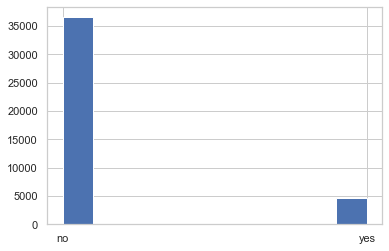

In [5]:
data['y'].hist()

More than half of the individuals are married, and less than third have a university degree.
About 89% of the individuals opted out of subscribing to a term deposit. This may suggest some imbalance in the variable to predict.

For the attribute education, we will now regroup the values “basic.4y”, “basic.9y” and “basic.6y” under “basic”.

In [6]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])
test['education']=np.where(test['education'] =='basic.9y', 'Basic', test['education'])
test['education']=np.where(test['education'] =='basic.6y', 'Basic', test['education'])
test['education']=np.where(test['education'] =='basic.4y', 'Basic', test['education'])

Next let's see how our target variable is ditributed taking into account education

Text(0, 0.5, 'Purchase')

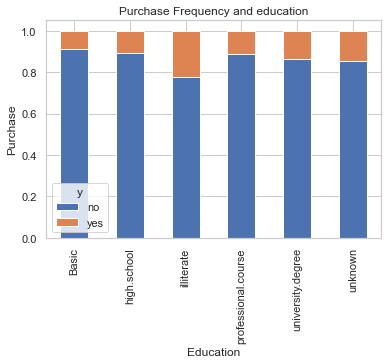

In [7]:
plt.rc("font", size=20)
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title('Purchase Frequency and education')
plt.xlabel('Education')
plt.ylabel('Purchase')

It appears that education affects our target variable. A change in the academic level induce a change in the proportions of costumers who would subscribe to a term deposit.The same thing can be said about nature of the job :

Text(0, 0.5, 'Purchase')

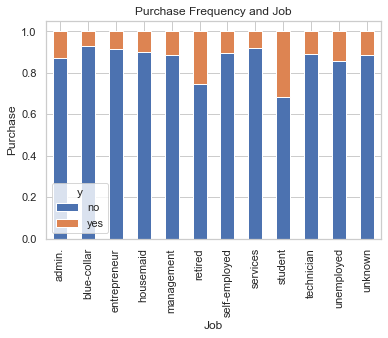

In [8]:
plt.rc("font", size=30)
table=pd.crosstab(data.job,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title('Purchase Frequency and Job')
plt.xlabel('Job')
plt.ylabel('Purchase')

<H4>Numerical variables

In [9]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
data.loc[data['y']=='yes'].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000
mean,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991
std,13.837476,401.171871,1.666245,403.407181,0.860344,1.623626,0.676644,6.139668,1.742598,87.572641
min,17.000000,37.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,253.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,0.849000,5017.500000
50%,37.000000,449.000000,2.000000,999.000000,0.000000,-1.800000,93.200000,-40.400000,1.266000,5099.100000
75%,50.000000,741.250000,2.000000,999.000000,1.000000,-0.100000,93.918000,-36.100000,4.406000,5191.000000
max,98.000000,4199.000000,23.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
data.loc[data['y']=='no'].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000
mean,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
std,9.898132,207.096293,2.873438,120.656868,0.409199,1.482932,0.558993,4.391155,1.638187,64.571979
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,95.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.405000,5099.100000
50%,38.000000,163.500000,2.000000,999.000000,0.000000,1.100000,93.918000,-41.800000,4.857000,5195.800000
75%,47.000000,279.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.962000,5228.100000
max,95.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Looking at the average values of the attributes, we can say:

1. The average age of customers who bought the term deposit is higher than that of the customers who didn’t.
2. The lower the pdays,the better chances the bank has to sale a term deposit account.


<H1> Building the model

Since the predicted variable is a binary variable, I chose to use the logistic regression algorithm 

First let's encode our target variable

In [12]:
data['y']=data['y'].map({'yes':1,'no':0})
test['y']=test['y'].map({'yes':1,'no':0})

And create the dummy variables

In [13]:
df=pd.get_dummies(data)
test_bis=pd.get_dummies(test)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_admin.                     41188 non-null  uint8  
 12  job_blue-collar                41188 non-null 

In [15]:
y=df['y']
x=df.drop('y',axis=1)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y,test_size=0.20)

In [17]:
model=LogisticRegression(max_iter=1500)
res=model.fit(x_train,y_train)

In [18]:
y_pred=res.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[7099  211]
 [ 564  364]]


The confusion matrix tells us that we have 7463 (7099+364) correct predictions and 775 (564+211) incorrect ones

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7310
           1       0.63      0.39      0.48       928

    accuracy                           0.91      8238
   macro avg       0.78      0.68      0.72      8238
weighted avg       0.89      0.91      0.90      8238



Our classifier is unable to precisely determine if a client will subscribe to a term deposit, whereas it excels in predicting the value '0'. This can be related to the fact that we heave an imbalaced dataset : Almost 90% of the clients in our dataset opted out of subscribing to a term deposit.
This problem is frequent in binary classification tasks, and it can be corrected using the SMOTE (Synthetic Minority Over-sampling Technique) Algorithm (https://arxiv.org/pdf/1106.1813.pdf).

I will try implementing it in a later version of this notebook